In [1]:
import requests
from lxml import html
import re
import urllib
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pyecharts import Map

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\anaconda\envs\tensorflow_gpu\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
exc16=pd.read_excel('山东科技大学二〇一六年录取情况统计表.xls')
exc16['Unnamed: 3'][0]='科类二'
excin = exc16[0:29]
excin.columns=excin.iloc[0]
excin=excin.drop([0,])
excin=excin[['科类','科类二','计划','录取','投档最高','投档最低','录取\n分数','平均']]
excin['科类']=excin['科类'].fillna(method='ffill')
excin['投档最高']=excin['投档最高'].fillna(method='ffill')
excin['投档最低']=excin['投档最低'].fillna(method='ffill')
excin.index=[excin['科类'],excin['科类二']]
del excin['科类'],excin['科类二']
excin

0                            计划    录取     投档最高     投档最低     录取\n分数     平均
科类           科类二                                                         
本科提前批        综合评价文科          57    57    81.68      NaN      74.68    NaN
             综合评价理科         123   123    84.72      NaN      76.12    NaN
本科一批\n       文科             532   557      576      544        544    549
             理科            4095  4271      615      568        568    577
             贫困专项理科         160   165      581      537        537    545
艺术类\n        视觉传达设计（文）       33    33  483/269  317/190    324/190    227
             环境设计（文）         33    33  483/269  317/190  317/204.7    245
             产品设计（文）         23    23  483/269  317/190  383/190.7    229
             视觉传达设计（理）        7     7  478/285  294/195    294/208    238
             环境设计（理）          7     7  478/285  294/195  330/195.3    255
             产品设计（理）          7     7  478/285  294/195    396/202    234
             音乐学（文）          30    25      446      310   310/76.7   81.4
             音乐学（理）          10    12      387      304   304/73.9   77.7
本科二批         文科             215   227      548      519        519  526.1
             理科             885   927      594      524        524  533.7
煤炭定向         理科              80    84      561      470        470  498.7
中外合作本科       文科             145   165      523      503        503  509.7
             理科             265   280      552      504        504  516.9
校企合作本科       文科              80    62      549      530        530  535.1
             理科             200   229      546      489        489  504.9
春季高考本科计划     测绘工程（03采矿技术）    10    10      636      532        532  562.5
             测绘工程（04土建）      30    32      627      609        609  616.7
本二（泰山科技学院）   文科             182   191      500      474        474  479.6
             理科             266   275      532      453        453  463.7
专科（泰山科技学院）   理科             300   279      453      176        176  327.1
春季高考（泰山科技学院） 机械电子工程          40    42      598      553        553  561.9
             电气工程及其自动化       40    42      622      603        603  609.7
             会计学             40    42      649      632        632    637

In [3]:
excin

0                            计划    录取     投档最高     投档最低     录取\n分数     平均
科类           科类二                                                         
本科提前批        综合评价文科          57    57    81.68      NaN      74.68    NaN
             综合评价理科         123   123    84.72      NaN      76.12    NaN
本科一批\n       文科             532   557      576      544        544    549
             理科            4095  4271      615      568        568    577
             贫困专项理科         160   165      581      537        537    545
艺术类\n        视觉传达设计（文）       33    33  483/269  317/190    324/190    227
             环境设计（文）         33    33  483/269  317/190  317/204.7    245
             产品设计（文）         23    23  483/269  317/190  383/190.7    229
             视觉传达设计（理）        7     7  478/285  294/195    294/208    238
             环境设计（理）          7     7  478/285  294/195  330/195.3    255
             产品设计（理）          7     7  478/285  294/195    396/202    234
             音乐学（文）          30    25      446      310   310/76.7   81.4
             音乐学（理）          10    12      387      304   304/73.9   77.7
本科二批         文科             215   227      548      519        519  526.1
             理科             885   927      594      524        524  533.7
煤炭定向         理科              80    84      561      470        470  498.7
中外合作本科       文科             145   165      523      503        503  509.7
             理科             265   280      552      504        504  516.9
校企合作本科       文科              80    62      549      530        530  535.1
             理科             200   229      546      489        489  504.9
春季高考本科计划     测绘工程（03采矿技术）    10    10      636      532        532  562.5
             测绘工程（04土建）      30    32      627      609        609  616.7
本二（泰山科技学院）   文科             182   191      500      474        474  479.6
             理科             266   275      532      453        453  463.7
专科（泰山科技学院）   理科             300   279      453      176        176  327.1
春季高考（泰山科技学院） 机械电子工程          40    42      598      553        553  561.9
             电气工程及其自动化       40    42      622      603        603  609.7
             会计学             40    42      649      632        632    637

In [4]:
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决保存图像时符号-显示为方块的2问题

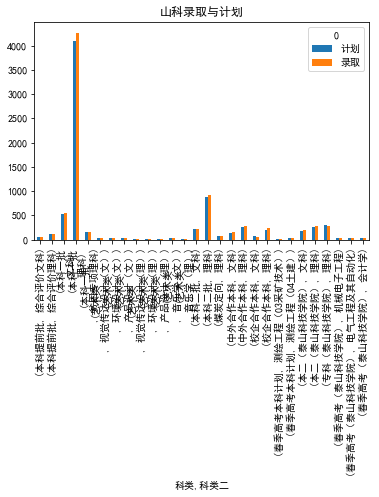

In [5]:
excin.plot(kind='bar',title='山科录取与计划')
plt.show()

In [6]:
excin_without_art=excin.drop(['艺术类\n'])
excin_without_art

D:\anaconda\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  """Entry point for launching an IPython kernel.


0                            计划    录取   投档最高 投档最低 录取\n分数     平均
科类           科类二                                               
本科提前批        综合评价文科          57    57  81.68  NaN  74.68    NaN
             综合评价理科         123   123  84.72  NaN  76.12    NaN
本科一批\n       文科             532   557    576  544    544    549
             理科            4095  4271    615  568    568    577
             贫困专项理科         160   165    581  537    537    545
本科二批         文科             215   227    548  519    519  526.1
             理科             885   927    594  524    524  533.7
煤炭定向         理科              80    84    561  470    470  498.7
中外合作本科       文科             145   165    523  503    503  509.7
             理科             265   280    552  504    504  516.9
校企合作本科       文科              80    62    549  530    530  535.1
             理科             200   229    546  489    489  504.9
春季高考本科计划     测绘工程（03采矿技术）    10    10    636  532    532  562.5
             测绘工程（04土建）      30    32    627  609    609  616.7
本二（泰山科技学院）   文科             182   191    500  474    474  479.6
             理科             266   275    532  453    453  463.7
专科（泰山科技学院）   理科             300   279    453  176    176  327.1
春季高考（泰山科技学院） 机械电子工程          40    42    598  553    553  561.9
             电气工程及其自动化       40    42    622  603    603  609.7
             会计学             40    42    649  632    632    637

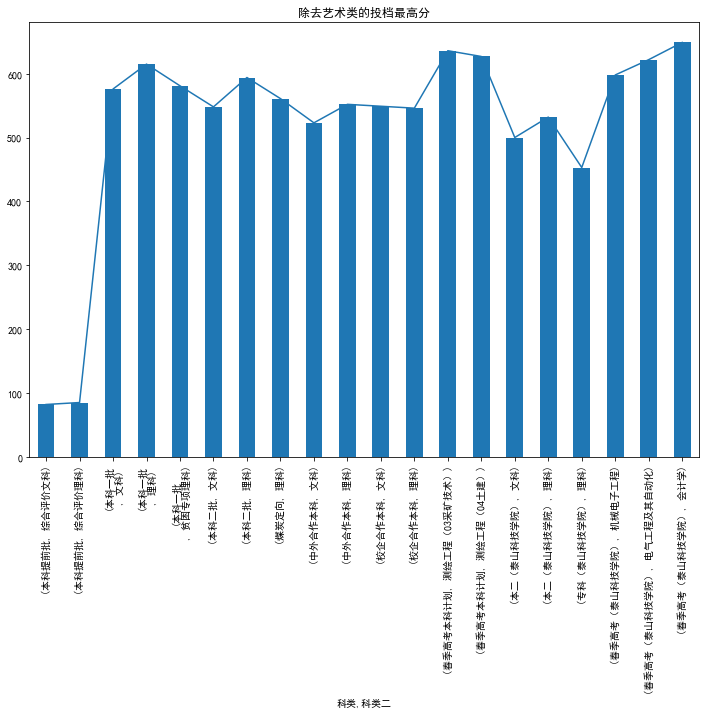

In [7]:
# plt.figure(figsize=(12,8))
excin_without_art['投档最高']=excin_without_art['投档最高'].astype(float)
excin_without_art['投档最高'].plot(figsize=(12,8))
excin_without_art['投档最高'].plot(kind='bar',title='除去艺术类的投档最高分',figsize=(12,8))
plt.show()

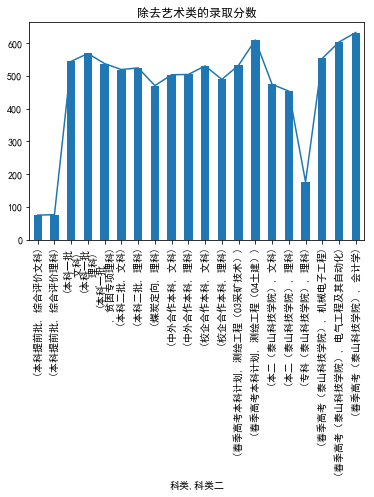

In [8]:
excin_without_art['录取\n分数']=excin_without_art['录取\n分数'].astype(float)
excin_without_art['录取\n分数'].plot()
excin_without_art['录取\n分数'].plot(kind='bar',title='除去艺术类的录取分数')
plt.show()

D:\anaconda\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  """Entry point for launching an IPython kernel.


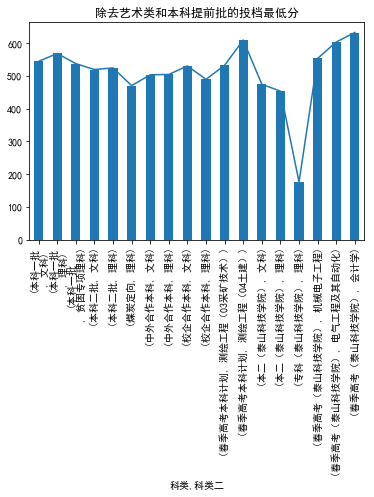

In [9]:
excin_without_artAndpre=excin_without_art.drop(['本科提前批',])
excin_without_artAndpre['投档最低']=excin_without_artAndpre['投档最低'].astype(float)
excin_without_artAndpre['投档最低'].astype(float).plot()
excin_without_artAndpre['投档最低'].plot(kind='bar',title='除去艺术类和本科提前批的投档最低分')
plt.show()


D:\anaconda\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  """Entry point for launching an IPython kernel.


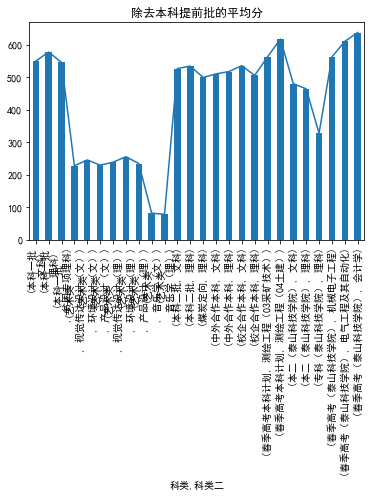

In [10]:
excin_without_pre=excin.drop(['本科提前批',])
excin_without_pre['平均']=excin_without_pre['平均'].astype(float)
excin_without_pre['平均'].astype(float).plot()
excin_without_pre['平均'].plot(kind='bar',title='除去本科提前批的平均分')
plt.show()


In [11]:
excout = exc16[32:]

excout.columns=excout.iloc[0]
excout=excout.drop([32])
excout[['省码','省市','批次']]=excout[['省码','省市','批次']].fillna(method='ffill')
excout = excout.drop([58,67])
excout = excout.fillna(method='ffill',axis=1)
excout.index = [excout['省市'],excout['科类']]
del excout['省码'],excout['科类']



In [15]:
exp=excout.drop(['省市','批次'],axis=1)
exp.astype(float)

32          计划  一志愿录取  二志愿录取   投档最高   投档最低   录取分数      平均    二本线    一本线
省市  科类                                                                 
北京  文科     2.0    2.0    0.0  568.0  568.0  532.0  568.00  532.0  583.0
    理科     5.0    5.0    0.0  528.0  519.0  519.0  524.10  494.0  548.0
天津  文科    14.0   14.0    0.0  516.0  493.0  493.0  500.40  460.0  532.0
    理科    16.0   16.0    0.0  530.0  485.0  485.0  495.90  424.0  512.0
河北  文科    17.0   17.0    0.0  586.0  570.0  570.0  577.40  416.0  535.0
    理科   123.0  123.0    1.0  609.0  574.0  574.0  585.00  364.0  525.0
    艺术文   10.0   10.0    0.0  257.0  250.7  250.7  253.95  180.0  180.0
山西  中外文    5.0    5.0    0.0  514.0  499.0  499.0  505.00  460.0  518.0
    中外理   13.0   13.0    0.0  517.0  496.0  496.0  500.00  438.0  519.0
    文科     4.0    4.0    0.0  536.0  532.0  532.0  533.90  460.0  518.0
    理科    68.0   66.0    2.0  549.0  531.0  531.0  536.00  438.0  519.0
    艺术文   10.0   10.0    0.0  250.3  243.7  243.7  245.40  200.0  200.0
内蒙古 文科    12.0   12.0    0.0  529.0  498.0  498.0  516.80  375.0  477.0
    理科    28.0   28.0    0.0  560.0  500.0  500.0  528.40  346.0  484.0
辽宁  中外文    5.0    1.0    3.0  526.0  526.0  526.0  526.00  417.0  525.0
    中外理    5.0    5.0    0.0  527.0  523.0  523.0  524.70  373.0  498.0
    文科    10.0   10.0    0.0  544.0  531.0  531.0  535.80  417.0  525.0
    理科    20.0   20.0    0.0  554.0  527.0  527.0  533.70  373.0  498.0
吉林  文科    12.0   10.0    2.0  554.0  534.0  534.0  547.00  413.0  531.0
    理科    28.0   27.0    1.0  557.0  538.0  530.0  545.60  402.0  530.0
黑龙江 文科     4.0    4.0    0.0  536.0  527.0  527.0  531.10  401.0  481.0
    理科    56.0   56.0    0.0  569.0  553.0  553.0  556.50  369.0  486.0
上海  文科     4.0    4.0    0.0  400.0  383.0  383.0  390.00  368.0  368.0
    理科     6.0    6.0    0.0  415.0  381.0  360.0  389.30  360.0  360.0
江苏  理科    40.0   40.0    0.0  359.0  353.0  353.0  354.70  315.0  353.0
    中外文    5.0    5.0    0.0  344.0  343.0  343.0  343.60  325.0  355.0
    中外理    5.0    5.0    0.0  340.0  334.0  334.0  336.20  315.0  353.0
浙江  中外文    2.0    2.0    0.0  546.0  542.0  542.0  544.00  462.0  603.0
    中外理    5.0    1.0    4.0  461.0  461.0  461.0  500.00  439.0  600.0
    文科    15.0   15.0    0.0  550.0  541.0  541.0  545.00  462.0  603.0
...        ...    ...    ...    ...    ...    ...     ...    ...    ...
河南  中外理   12.0    4.0    8.0  555.0  526.0  526.0  535.60  447.0  523.0
    艺术文   10.0   10.0    0.0  275.0  256.0  256.0  267.00  202.0  202.0
湖北  文科     8.0    8.0    0.0  558.0  548.0  548.0  550.50  403.0  520.0
    理科    32.0   32.0    0.0  570.0  535.0  535.0  551.10  350.0  512.0
湖南  理科    50.0   50.0    0.0  559.0  541.0  541.0  547.00  439.0  517.0
广东  文科     4.0    4.0    0.0  499.0  496.0  496.0  498.00  417.0  514.0
    理科     6.0    6.0    0.0  506.0  489.0  489.0  496.70  402.0  508.0
广西  文科    18.0   18.0    0.0  554.0  469.0  469.0  521.40  400.0  545.0
    理科    82.0   80.0    2.0  512.0  455.0  455.0  472.00  333.0  502.0
海南  文科     9.0    7.0    2.0  705.0  658.0  658.0  693.30  577.0  653.0
    理科    31.0   25.0    6.0  640.0  603.0  603.0  616.30  543.0  602.0
重庆  文科     8.0    6.0    2.0  541.0  528.0  528.0  532.40  435.0  527.0
    理科    32.0   31.0    1.0  588.0  526.0  526.0  534.00  416.0  525.0
四川  文科    16.0   13.0    3.0  561.0  540.0  540.0  553.80  480.0  540.0
    理科    84.0   81.0    3.0  567.0  542.0  542.0  549.80  453.0  532.0
贵州  文科     6.0    6.0    0.0  593.0  586.0  586.0  590.40  457.0  551.0
    理科    62.0   60.0    2.0  539.0  498.0  498.0  511.20  365.0  473.0
    文科    16.0   16.0    0.0  544.0  522.0  522.0  532.90  457.0  551.0
    理科    86.0   86.0    0.0  493.0  454.0  454.0  457.00  365.0  473.0
云南  理科    60.0   60.0    0.0  571.0  533.0  533.0  546.70  445.0  525.0
西藏  理科    23.0   13.0    2.0  321.0  295.0  295.0  304.40  235.0  285.0
陕西  文科    14.0   13.0    0.0  547.0  520.0  520.0  527.80  460.0  511.0
    理科    86.0   82.0    4.0  536.0  505

<Figure size 2880x576 with 0 Axes>

<Figure size 2880x576 with 0 Axes>

<Figure size 2880x576 with 0 Axes>

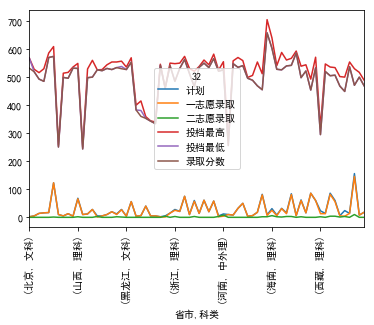

In [18]:
excout.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
multisum=excout['计划'].groupby(excout['省市']).sum()
multisum

In [ ]:
multisum['山东']=excin['录取'].sum()

In [ ]:
multisum

In [ ]:
num_list=list(multisum.values)

In [ ]:
city_list=list(multisum.index)

In [ ]:
map= Map('来自各省人数'"单位：万人", title_color="#fff", title_pos="center", width=800,  height=600, background_color='#404a59')

In [ ]:
attr=city_list

value=num_list

map.add("", attr, value, visual_range=[0, 200], visual_text_color="#fff",
        symbol_size=30, is_visualmap=True,is_label_show=True)

In [ ]:
name_tp=('山东科技大学二〇一五年录取情况统计表.xls',
           '山东科技大学二〇一四年录取情况统计表.xls',
           '山东科技大学二〇一三年录取情况统计表.xls')
num_in=(30,28,23)
num_out=(33,31,26)

In [ ]:
def data_deal(name,num_in,num_out):
    #省内处理
    exc=pd.read_excel(name)
    exc['Unnamed: 3'][0]='科类二'
    excin = exc[0:num_in]
    excin.columns=excin.iloc[0]
    excin=excin.drop([0,])
    excin=excin[['科类','科类二','计划','录取','投档最高','投档最低','录取\n分数','平均']]
    excin['科类']=excin['科类'].fillna(method='ffill')
    excin['投档最高']=excin['投档最高'].fillna(method='ffill')
    excin['投档最低']=excin['投档最低'].fillna(method='ffill')
    #使用多级index
    excin.index=[excin['科类'],excin['科类二']]
    del excin['科类'],excin['科类二']
    #省外处理
    excout = exc[num_out:]
    excout.columns=excout.iloc[0]
    excout=excout.drop([num_out])
    excout[['省码','省市','批次']]=excout[['省码','省市','批次']].fillna(method='ffill')
    excout = excout.fillna(method='ffill',axis=1)
    excout.index = [excout['省市'],excout['科类']]
    del excout['省码'],excout['科类']
    
    return excin,excout

In [ ]:
multisum=excout['计划'].groupby(excout['省市']).sum()
for d,i,o in zip(name_tp,num_in,num_out):
    excin,excout=data_deal(d,i,o)
    ser=excout['计划'].groupby(excout['省市']).sum()
    multisum=pd.concat([multisum,ser],axis=1)
multisum=multisum.fillna(0)

In [ ]:
multisum.columns=[2016,2015,2014,2013]

In [ ]:
plt.figure(figsize=(40,8))
sns.lineplot(data=multisum)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)
plt.show()